In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv("students_dataset.csv")

In [155]:
df.head()

,first_name,last_name,standard,attendance,study_hours,assignments,semester,final_grade
0,Aditi,Malhotra,8,86,29,8,1,100.0
1,Meera,Bose,12,85,22,6,2,84.3
2,Simran,Patel,11,84,21,7,1,89.3
3,Ananya,Sharma,12,68,6,3,1,52.8
4,Tanvi,Mehta,8,69,1,1,1,30.9


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   first_name   200 non-null    object 
 1   last_name    200 non-null    object 
 2   standard     200 non-null    int64  
 3   attendance   200 non-null    int64  
 4   study_hours  200 non-null    int64  
 5   assignments  200 non-null    int64  
 6   semester     200 non-null    int64  
 7   final_grade  200 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [157]:
df.describe()

,standard,attendance,study_hours,assignments,semester,final_grade
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000
mean,10.130000,74.14500,14.445000,5.380000,1.49500,67.115500
std,1.474439,14.93214,8.259423,2.841827,0.50123,16.608958
min,8.000000,50.00000,1.000000,1.000000,1.00000,30.500000
25%,9.000000,61.75000,6.750000,3.000000,1.00000,54.450000
50%,10.000000,74.50000,14.000000,5.000000,1.00000,67.400000
75%,11.250000,86.00000,22.000000,8.000000,2.00000,78.525000
max,12.000000,100.00000,29.000000,10.000000,2.00000,100.000000


In [158]:
df.isnull().sum()

,0
first_name,0
last_name,0
standard,0
attendance,0
study_hours,0
assignments,0
semester,0
final_grade,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   first_name   200 non-null    object 
 1   last_name    200 non-null    object 
 2   standard     200 non-null    int64  
 3   attendance   200 non-null    int64  
 4   study_hours  200 non-null    int64  
 5   assignments  200 non-null    int64  
 6   semester     200 non-null    int64  
 7   final_grade  200 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [160]:
df.columns

Index(['first_name', 'last_name', 'standard', 'attendance', 'study_hours',
       'assignments', 'semester', 'final_grade'],
      dtype='object')

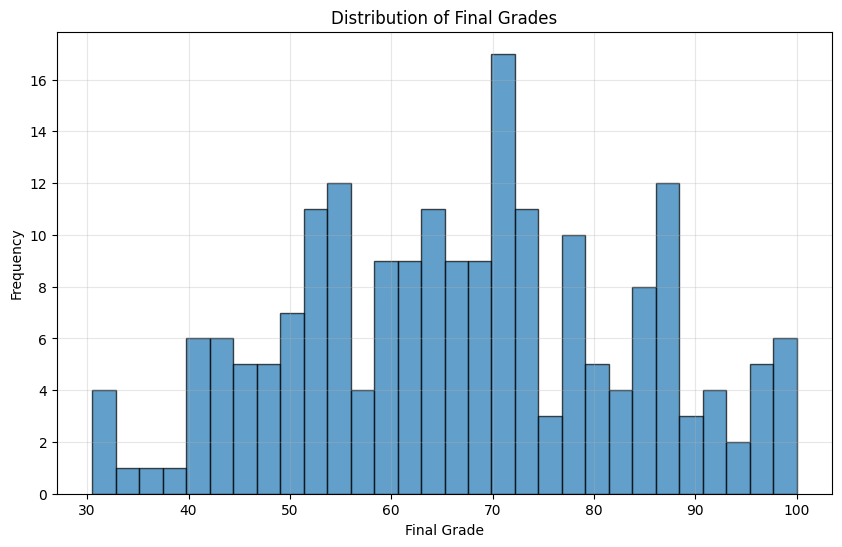

In [161]:
plt.figure(figsize=(10, 6))
plt.hist(df['final_grade'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Final Grades')
plt.grid(True, alpha=0.3)
plt.show()

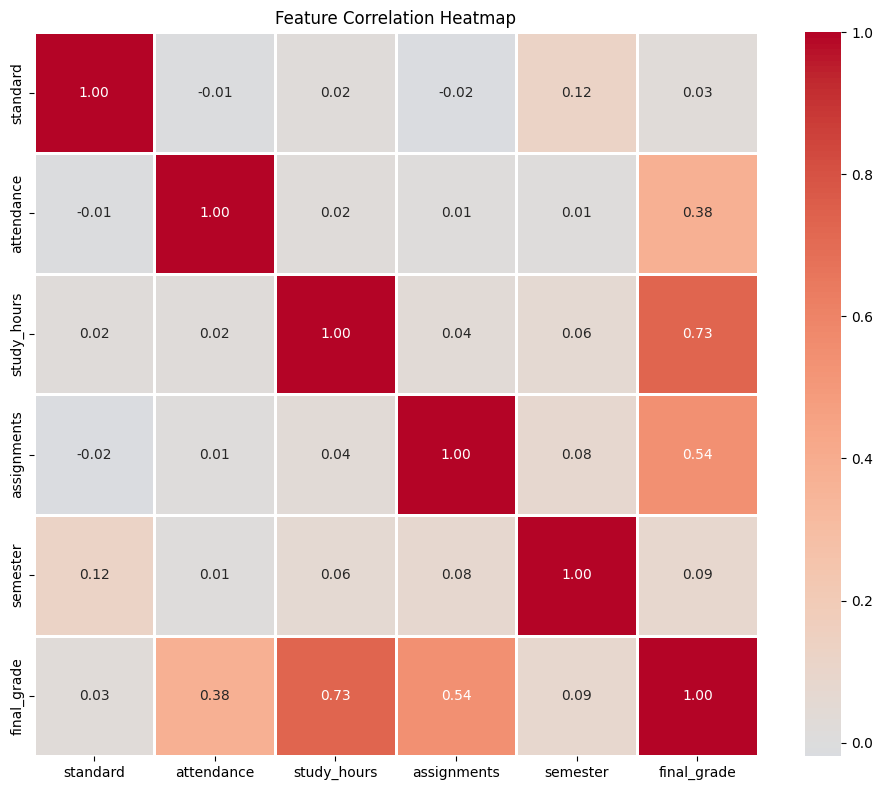

In [162]:
numeric_cols = ['standard', 'attendance', 'study_hours', 'assignments', 'semester', 'final_grade']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [163]:
X = df[["standard", "attendance", "study_hours", "assignments", "semester"]]
y = df["final_grade"]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
model = LinearRegression()

In [167]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [174]:
y_pred = model.predict(X_test_scaled)

In [178]:
mse = mean_squared_error(y_test, y_pred)

In [179]:
rmse = np.sqrt(mse)

In [180]:
mae = mean_absolute_error(y_test, y_pred)

In [181]:
r2 = r2_score(y_test, y_pred)

In [182]:
joblib.dump(model, "linear_regression_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']